In [1]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
train = pd.read_table('ratings_train.txt')

In [27]:
test = pd.read_table('ratings_test.txt')

In [28]:
print("훈련용 리뷰 갯수:",len(train))

훈련용 리뷰 갯수: 150000


In [29]:
print("테스트용 리뷰 갯수:",len(test))

테스트용 리뷰 갯수: 50000


In [30]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [31]:
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [32]:
train['document'].nunique(), test['document'].nunique()

(146182, 49157)

In [33]:
train.drop_duplicates(subset=['document'],inplace=True)

In [34]:
print("훈련용 리뷰 총 갯수:",len(train))

훈련용 리뷰 총 갯수: 146183


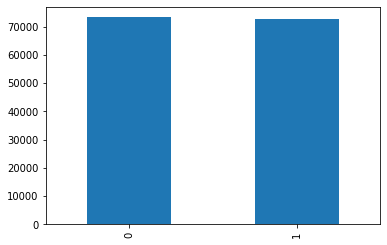

In [35]:
train['label'].value_counts().plot(kind='bar')

In [36]:
print(train.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [37]:
print(train.isnull().values.any())

True


In [38]:
print(train.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [39]:
train.loc[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1


In [40]:
train = train.dropna(how = 'any')

In [41]:
print(train.isnull().values.any())

False


In [42]:
train['document'].replace("", "float(NaN)",inplace=True)

In [43]:
train.isnull().values.any()

False

In [44]:
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train[:5]

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [45]:
train['document'].replace('',np.nan, inplace=True)
print(train.document.isnull().sum())

789


In [46]:
train.loc[train.document.isnull()][0:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [47]:
train = train.dropna(how='any')
print(len(train))

145393


In [48]:
test.drop_duplicates(subset=['document'], inplace=True)
test['documnet'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['document'].replace('',np.nan, inplace=True)
test = test.dropna(how='any')
print(len(test))

49157


In [49]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [50]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔',stem=True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [52]:
X_train = []
for sentence in train['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

KeyboardInterrupt: 

In [ ]:
print(X_train[:3])

In [54]:
X_test = []
for sentence in test['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [55]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [56]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '좋다': 6, '다': 7, '너무': 8, '하': 9, '정말': 10, '재밌다': 11, '적': 12, '되다': 13, '같다': 14, '진짜': 15, '있다': 16, '만': 17, '않다': 18, '로': 19, '아니다': 20, '에서': 21, '내': 22, '평점': 23, '최고': 24, '그': 25, '인': 26, '나': 27, '연기': 28, '생각': 29, '스토리': 30, '게': 31, '이영화': 32, '점': 33, '감동': 34, '드라마': 35, '사람': 36, '만들다': 37, '고': 38, '요': 39, '나오다': 40, '아깝다': 41, '배우': 42, 'ㅋㅋ': 43, '재미있다': 44, '지': 45, '이런': 46, '보고': 47, '왜': 48, '감독': 49, '때': 50, '네': 51, '그냥': 52, '재미없다': 53, '하고': 54, '들다': 55, '아': 56, '시간': 57, '못': 58, '까지': 59, '재미': 60, '중': 61, '쓰레기': 62, '지루하다': 63, '것': 64, '뭐': 65, '가다': 66, '말': 67, '모르다': 68, '면': 69, '주다': 70, '본': 71, '더': 72, '작품': 73, '거': 74, '알다': 75, '오다': 76, '자다': 77, '마지막': 78, '사랑': 79, '그렇다': 80, '저': 81, '정도': 82, '대': 83, '화': 84, '라': 85, '이나': 86, '많다': 87, 'ㅠㅠ': 88, '완전': 89, 'ㅋㅋㅋ': 90, 'ㅋ': 91, '안되다': 92, '개': 93, '처음': 94, '이렇게': 95, '액션': 96, '주인공': 97, '최악': 98, '느낌': 99, '니': 100, '내용': 101, '싶다': 102

In [57]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 35310
등장 빈도가 2번 이하인 희귀 단어의 수: 20048
단어 집합에서 희귀 단어의 비율: 56.77711696403285
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9296650031616784
